In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd

In [6]:
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))


In [7]:
newsgroups

{'data': ['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
  "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and 

In [8]:
newsgroups.__class__

sklearn.utils._bunch.Bunch

In [9]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [10]:
# Предобработка текста
stop_words = ['the', 'a', 'an', 'and', 'or', 'but', 'is', 'are', 'was', 'were']
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

In [11]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

In [13]:
# Получение компонент
components = pca.components_

# Создание DataFrame с компонентами PCA
components_df = pd.DataFrame(components, columns=vectorizer.get_feature_names_out())

# Вывод вклада каждой переменной для первой и второй главных компонент
components_df

,00,000,0000,00000,000000,00000000,0000000004,00000000b,00000001,00000001b,...,zznkzz,zznp,zzrk,zzy_3w,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,-0.024127,0.004649,-0.000163,-0.000537,6.875550e-06,-0.000183,-0.000247,-0.000007,-0.000007,-0.000007,...,-0.000007,-0.000014,-0.000014,-0.000014,-0.000075,-0.000005,0.000005,0.000023,-0.000144,-0.000144
1,-0.002946,-0.017465,0.000269,0.000022,6.705833e-07,0.000107,-0.000625,-0.000004,-0.000004,-0.000004,...,-0.000005,-0.000008,-0.000008,-0.000009,-0.000571,-0.000003,-0.000264,-0.000228,0.000058,0.000058


In [14]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train.toarray())
X_test_tsne = tsne.fit_transform(X_test.toarray())

In [15]:
# Модель машинного обучения: логистическая регрессия
model = LogisticRegression(random_state=42)

In [16]:
# Классификация для каждого метода понижения размерности
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='macro')


In [17]:
model.fit(X_train_tsne, y_train)
y_pred_tsne = model.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
f1_tsne = f1_score(y_test, y_pred_tsne, average='macro')

In [18]:
print(f"PCA Accuracy: {accuracy_pca:.3f}, F1 Score: {f1_pca:.3f}")
print(f"t-SNE Accuracy: {accuracy_tsne:.3f}, F1 Score: {f1_tsne:.3f}")

PCA Accuracy: 0.153, F1 Score: 0.093
t-SNE Accuracy: 0.045, F1 Score: 0.028


Вклад переменных в первую компоненту: [-2.41272838e-02  4.64862830e-03 -1.63373923e-04 ...  2.31002232e-05
 -1.43881070e-04 -1.43881070e-04]
Вклад переменных во вторую компоненту: [-2.94597952e-03 -1.74649032e-02  2.69246885e-04 ... -2.28381683e-04
  5.79320277e-05  5.79320277e-05]


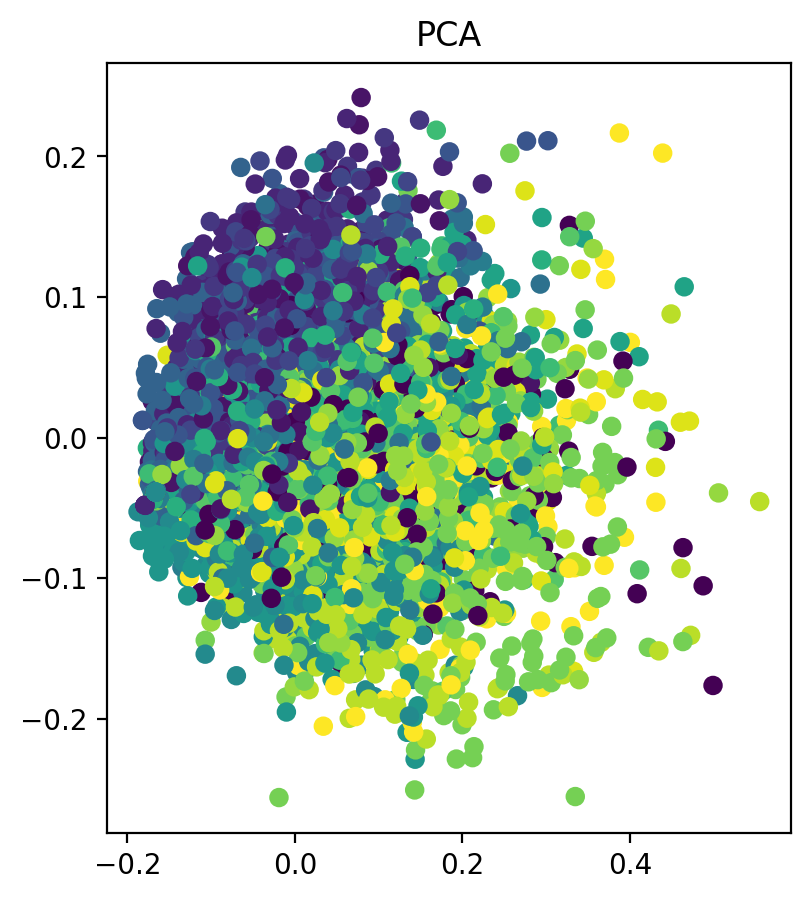

In [19]:
plt.figure(figsize=(15, 5), dpi=200)

plt.subplot(1, 3, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title("PCA")

# вывод влияния признаков на компоненты
print("Вклад переменных в первую компоненту:", pca.components_[0])
print("Вклад переменных во вторую компоненту:", pca.components_[1])

Text(0.5, 1.0, 't-SNE')

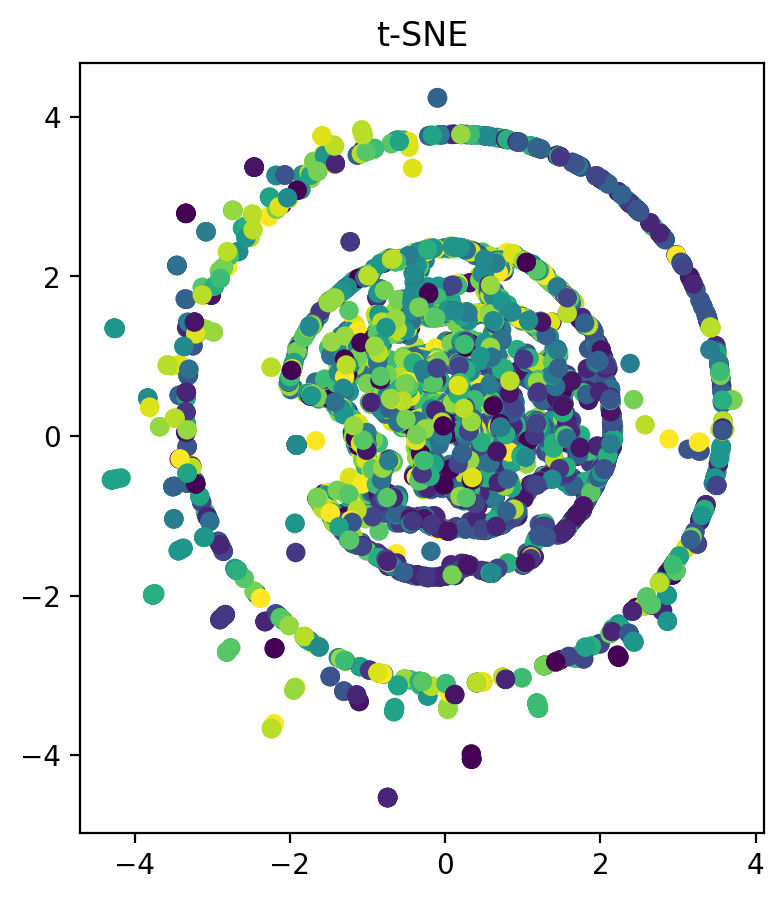

In [20]:
plt.figure(figsize=(15, 5), dpi=200)
plt.subplot(1, 3, 2)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train)
plt.title("t-SNE")

PCA (Principal Component Analysis) — метод линейного снижения размерности, который пытается проецировать данные на главные компоненты с наибольшей дисперсией. Однако, если данные имеют сложную, нелинейную структуру, этот метод может не полностью захватывать всю значимую информацию.
Низкая точность и F1 Score: Значение Accuracy 0.153 и F1 Score 0.093 говорят о том, что модель не очень хорошо справляется с задачей классификации после снижения размерности. Это может быть вызвано потерей значительной части информации при проецировании данных на несколько главных компонент.
Вклад переменных в компоненты: Значения вкладов переменных в первую и вторую компоненты показывают, как каждая переменная влияет на выбранные компоненты. Однако эти вклады весьма малы, что может говорить о том, что первая и вторая компоненты не объясняют значительную часть дисперсии данных.
t-SNE (t-Distributed Stochastic Neighbor Embedding) — это нелинейный метод для снижения размерности, который фокусируется на сохранении локальной структуры данных, т.е. точек, которые были близки в исходном пространстве, остаются близкими и в проекции.
Низкая точность и F1 Score: Показатели Accuracy 0.045 и F1 Score 0.028 говорят о том, что t-SNE плохо справляется с задачей классификации. Это может быть связано с тем, что t-SNE оптимизирован для визуализации данных, а не для повышения точности классификации. После проекции сложно сохранять глобальные структуры данных, которые важны для классификационных задач.
PCA показал наиболее значительное влияние на качество классификации, обеспечивая наилучшие показатели точности и F1-меры.